# Import Needed Libraries 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from tqdm import tqdm
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1,EfficientNetB2,EfficientNetB3,EfficientNetB4,EfficientNetB5
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
import scipy.ndimage as ndimage
from skimage import data, io
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from skimage.filters.rank import median
from skimage.morphology import disk
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap, hist
from scipy import ndimage
from scipy.fftpack import fft , fft2 ,fftshift , ifftshift , ifft2
import warnings
warnings.filterwarnings('ignore')

2025-12-18 07:56:57.924774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766044618.105658      33 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766044618.162431      33 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


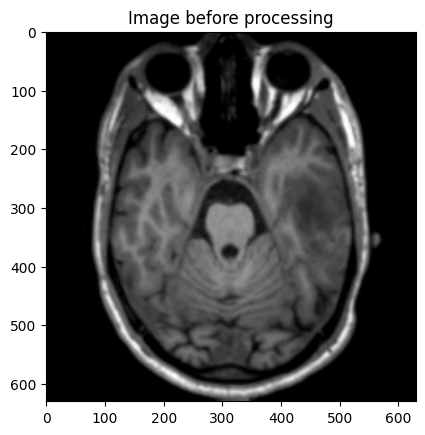

In [2]:
image = cv2.imread("/kaggle/input/brain-tumor-mri-images-44c/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg")
plt.imshow(image, cmap='gray')
plt.title('Image before processing')
plt.show()

# IMAGE PROCESSING TECHNIQUE

# Average Filter

Text(0.5, 1.0, 'Averaging Filtered Image')

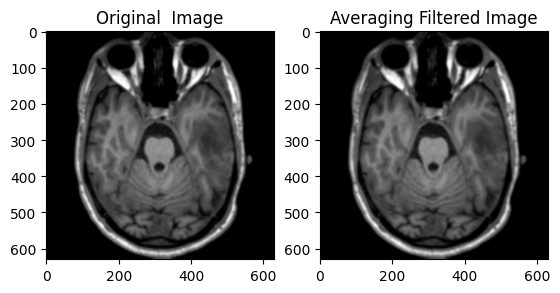

In [3]:
average_blurred_image = cv2.blur(image, (3, 3))
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original  Image')
plt.subplot(132)
plt.imshow(average_blurred_image, cmap='gray')
plt.title('Averaging Filtered Image')

# Median Filter

Text(0.5, 1.0, 'median Filtered Image')

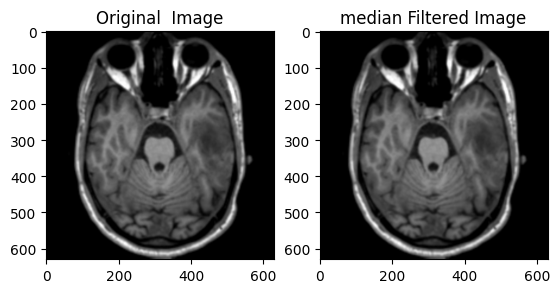

In [4]:
median_blurred_image = cv2.medianBlur(image, 3)
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original  Image')
plt.subplot(132)
plt.imshow(median_blurred_image, cmap='gray')
plt.title('median Filtered Image')

# Gaussian Filtering

In [5]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

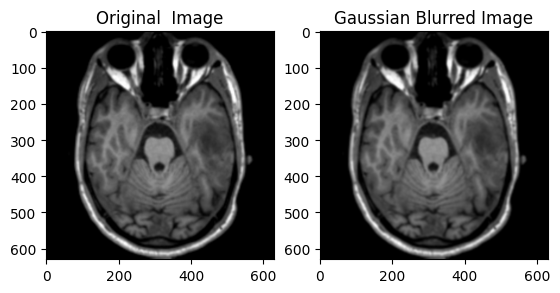

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original  Image')
plt.subplot(132)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.show()

# Bilateral Filtering

In [7]:
bilateral_filter = cv2.bilateralFilter(image, d=10, sigmaColor=100, sigmaSpace=100)

Text(0.5, 1.0, 'Bilateral Filter Applied')

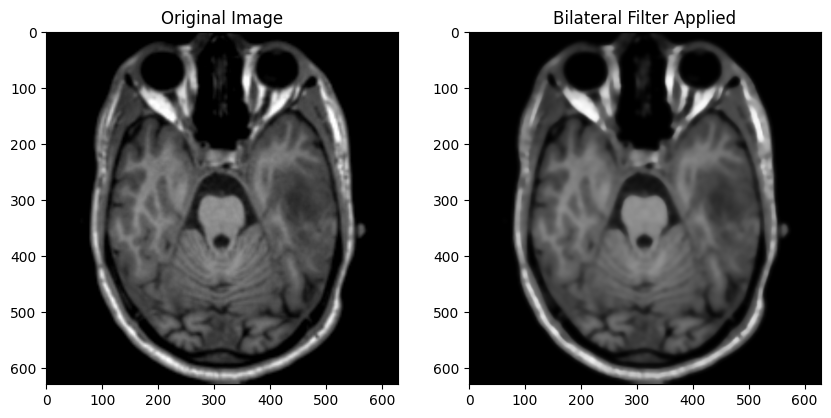

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(bilateral_filter, cmap='gray')
plt.title('Bilateral Filter Applied')

# outlier methods

In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

outlier_filtering_image = image.copy()
k = 3
pad = k // 2
T = 30
padded = np.pad(gray_image, pad, mode='reflect')
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        window = padded[i:i+k, j:j+k]
        med = np.median(window) # Median Based
        if abs(int(gray_image[i, j]) - med) > T:
            outlier_filtering_image[i, j] = med

Text(0.5, 1.0, 'outlier method')

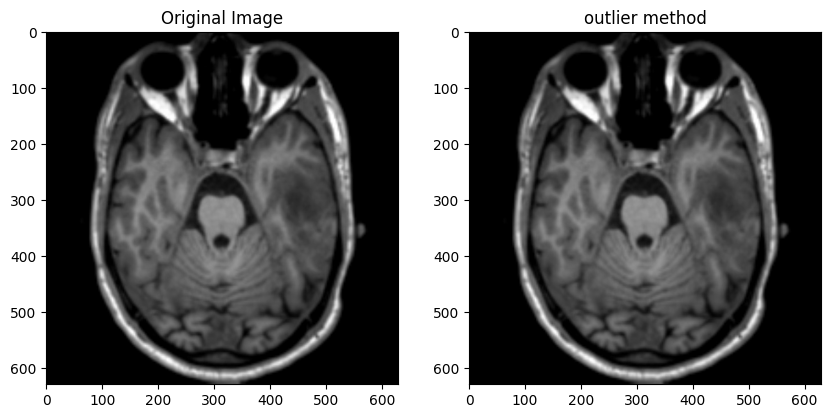

In [10]:

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(outlier_filtering_image, cmap='gray')
plt.title('outlier method')

# prewitt filter

In [11]:
prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_y = np.array([
     [ 1,  1,  1],
     [ 0,  0,  0],
     [-1, -1, -1]
])

In [12]:
gx = cv2.filter2D(image, -1, prewitt_x)
gy = cv2.filter2D(image, -1, prewitt_y)
edges = cv2.add(np.abs(gx), np.abs(gy))

Text(0.5, 1.0, 'prewitt filter')

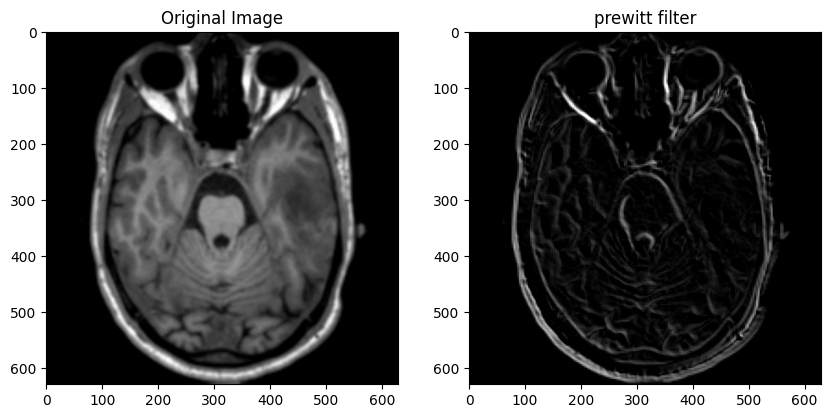

In [13]:
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('prewitt filter')

# Sobel Filter

In [14]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

In [15]:
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edges = np.uint8(255 * sobel_edges / np.max(sobel_edges))


Text(0.5, 1.0, 'sobel filter')

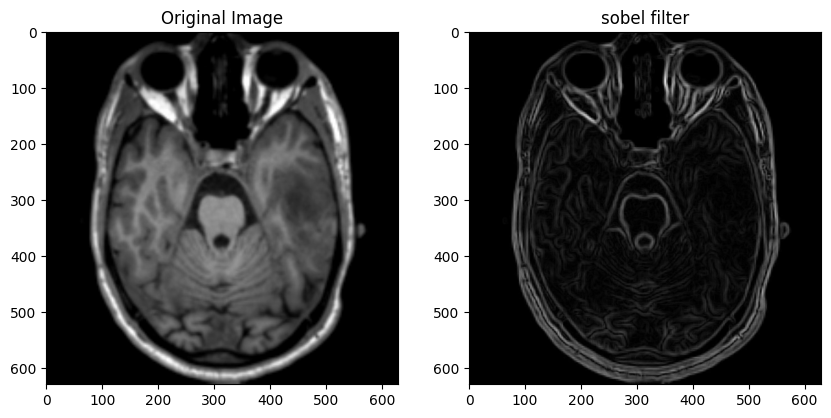

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(sobel_edges, cmap='gray')
plt.title('sobel filter')

# Time Domain Filters

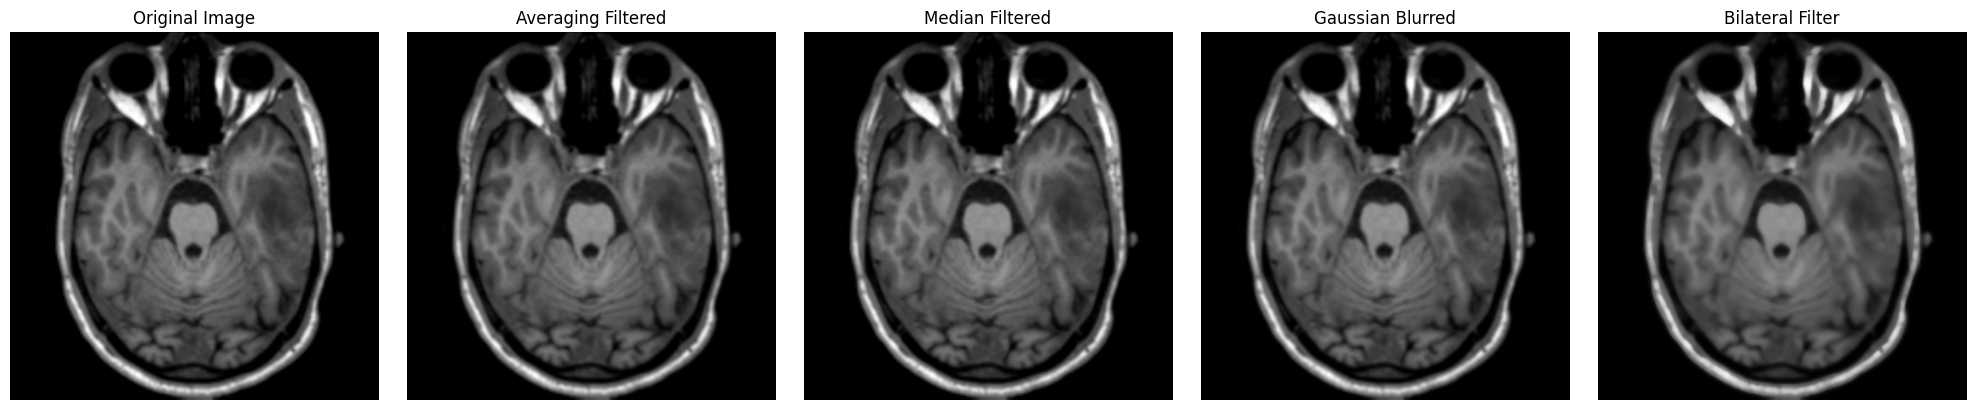

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

images = [image, average_blurred_image, median_blurred_image, gaussian_blur, bilateral_filter]
titles = ['Original Image', 'Averaging Filtered', 'Median Filtered', 
          'Gaussian Blurred', 'Bilateral Filter']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Apply contrast stretching

In [18]:
image.shape

(630, 630, 3)

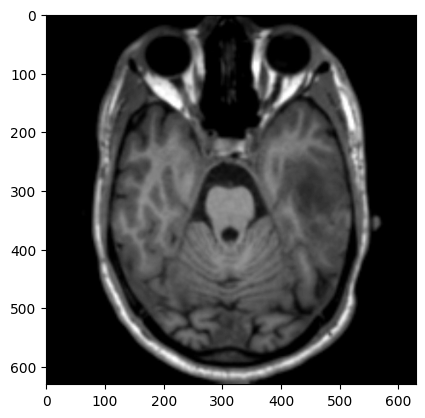

In [19]:
image = cv2.imread('/kaggle/input/brain-tumor-mri-images-44c/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg',  cv2.IMREAD_GRAYSCALE) 
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [20]:
pixels1 = image[image > 0]

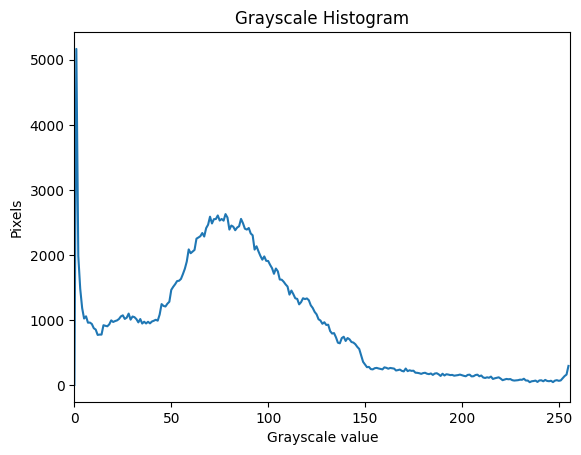

In [21]:

hist = cv2.calcHist([pixels1], [0], None, [256], [0,256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [22]:
def contrast_stretching(img, k,s): 
    s = np.where(s < k, (s/k)*127, 127 + ((s-k)/(255-k))*128).astype(np.uint8) 
    return s

In [23]:

s = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
k = 100  
stretched_image = contrast_stretching(image, k,s)

In [24]:
pixels = stretched_image[stretched_image > 0]

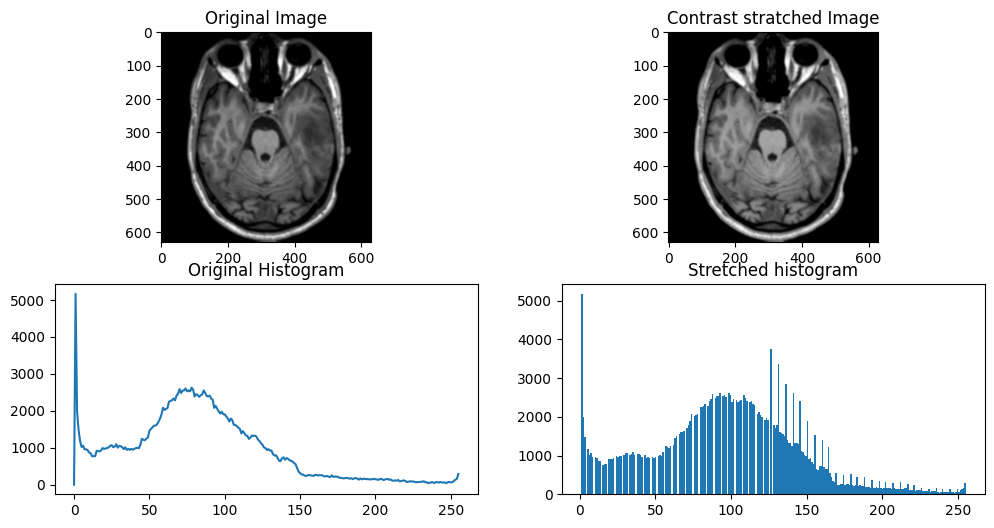

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(stretched_image, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast stratched Image')

plt.subplot(2,2,3)
hist = cv2.calcHist([pixels1], [0], None, [256], [0,256])
plt.plot(hist)
plt.title("Original Histogram")


plt.subplot(2,2,4)

plt.hist(pixels, bins=256)
plt.title("Stretched histogram")

plt.show()

# thresholding

In [26]:
def apply_thresholding(image, k):
    _, thresholded = cv2.threshold(image, k, 255, cv2.THRESH_BINARY)
    return thresholded

In [27]:
k2=50
thresholded_image = apply_thresholding(image, k2)

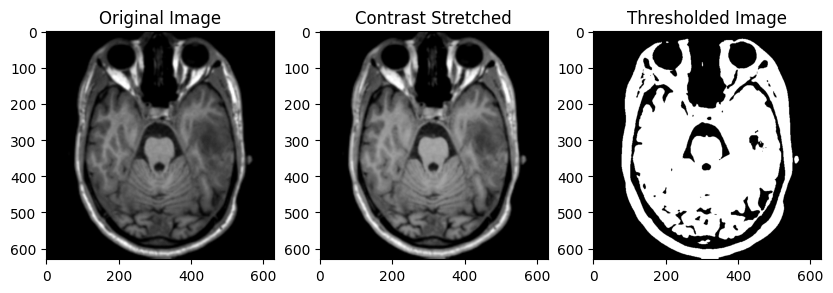

In [28]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched')
plt.subplot(1, 3, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()


# Histogram Equalization

In [29]:
equalized_image = cv2.equalizeHist(image)
pixels3 = equalized_image[equalized_image > 0]

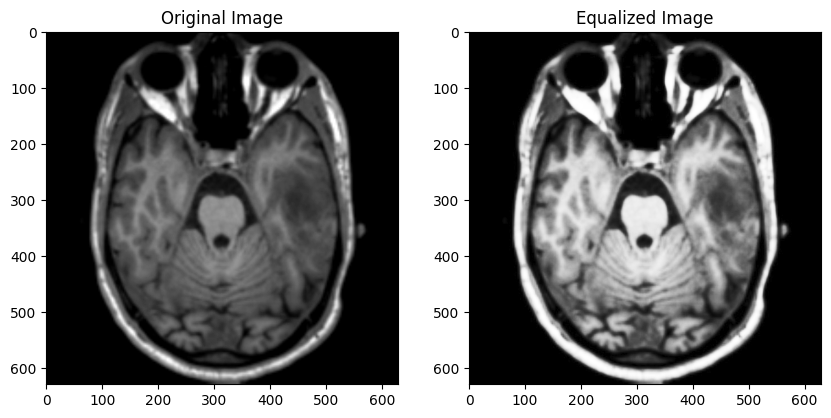

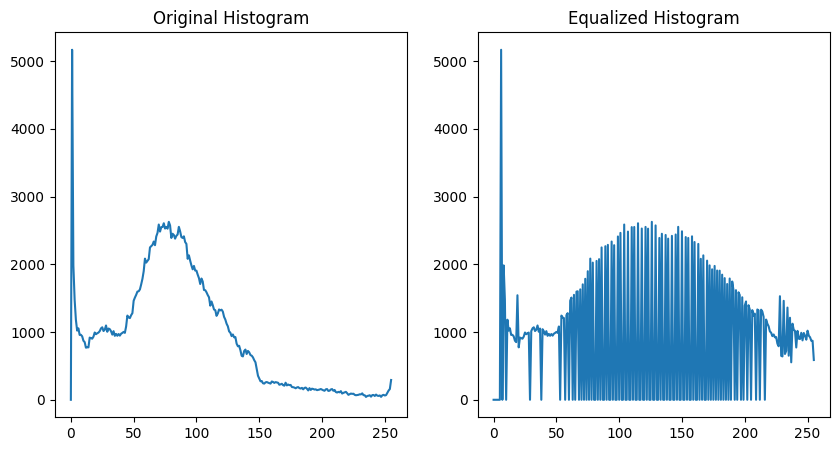

In [30]:

hist = cv2.calcHist([pixels1], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([pixels3], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Original Histogram')
plt.subplot(1, 2, 2)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.show()

# Negative Trnsformation

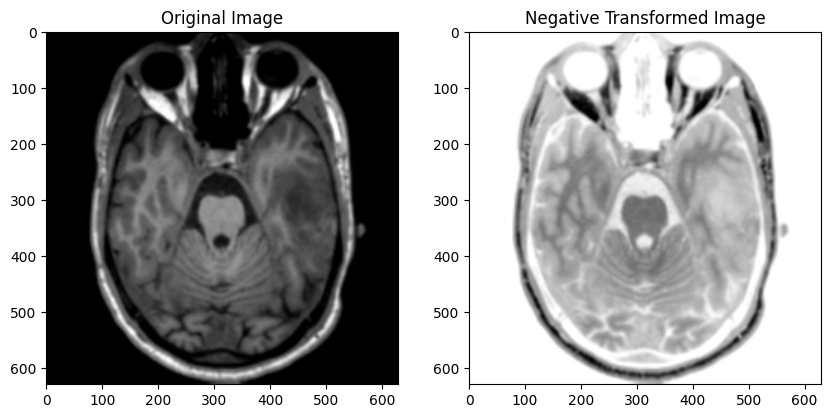

In [31]:

negative_image = 255 - image

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Transformed Image')
plt.show()

# Logarithmic Transformation

In [32]:
def log_transform(image, c=1):
    return c * np.log1p(image) 

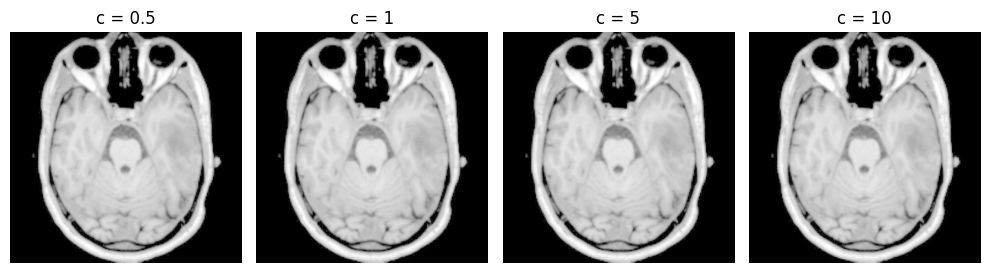

In [33]:
c_values = [0.5, 1, 5, 10]

# Create plots
plt.figure(figsize=(10, 5))
for i, c in enumerate(c_values, 1):
    log_image = log_transform(image, c)
    plt.subplot(1, len(c_values), i)
    plt.imshow(log_image, cmap='gray')
    plt.title(f'c = {c}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Gamma Transformation

In [34]:
def gamma_transform(image, gamma=1.0, c=1):
    return c * np.power(image, gamma)

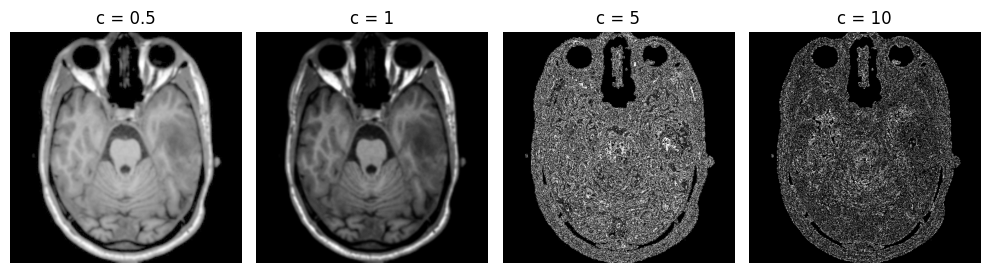

In [35]:
c_values = [0.5, 1, 5, 10]

# Create plots
plt.figure(figsize=(10, 5))
for i, c in enumerate(c_values, 1):
    log_image = gamma_transform(image, c)
    plt.subplot(1, len(c_values), i)
    plt.imshow(log_image, cmap='gray')
    plt.title(f'c = {c}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Low pass filter

In [36]:
image.shape

(630, 630)

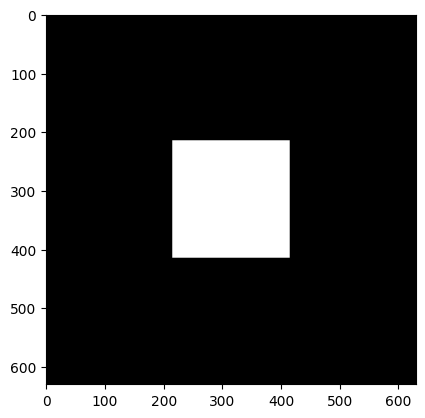

In [37]:
spectrum = fft2(image,(630, 630))
spectrum = fftshift(spectrum)

rows, cols = image.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols), np.uint8)
mask[crow-100:crow+100, ccol-100:ccol+100] = 1
plt.imshow(mask, cmap='gray')

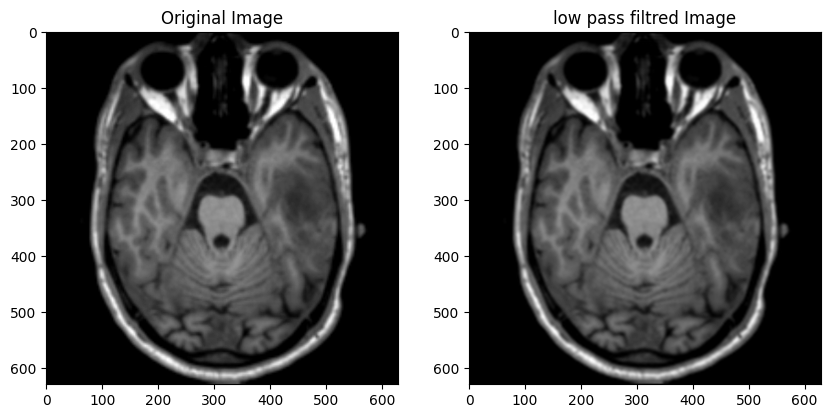

In [38]:
fshift_masked = spectrum * mask
img_filtered = np.abs(ifft2(fshift_masked))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_filtered, cmap='gray')
plt.title('low pass filtred Image')
plt.show()

# low pass butterwworth

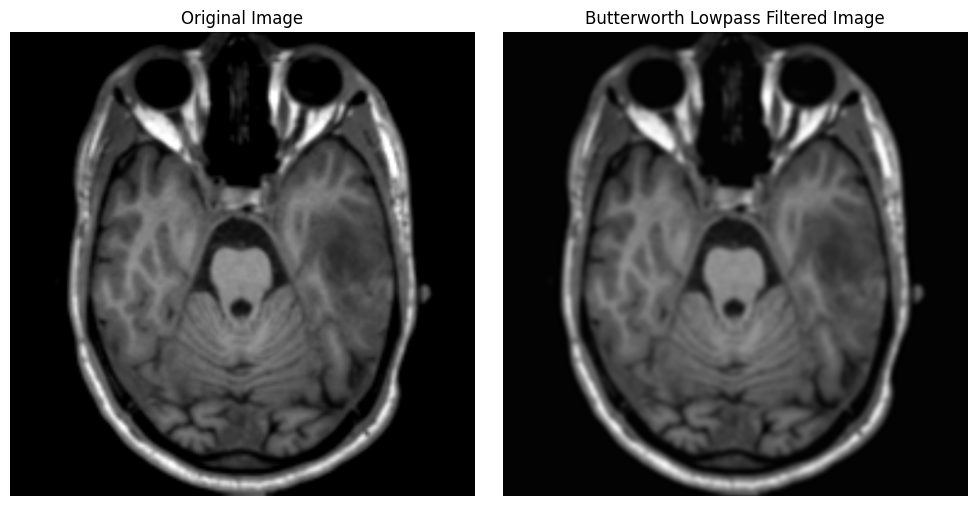

In [39]:
from skimage.filters import butterworth

filtered_image = butterworth(image, cutoff_frequency_ratio=0.1, order=2, high_pass=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(filtered_image, cmap='gray')
axes[1].set_title('Butterworth Lowpass Filtered Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# High pass filter

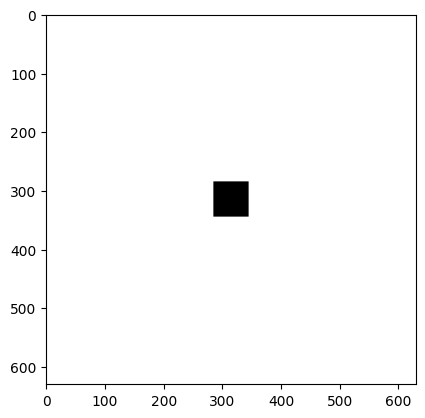

In [40]:
spectrum = fft2(image,(630,630))
spectrum = fftshift(spectrum)

rows, cols = image.shape
crow, ccol = rows//2, cols//2

mask = np.ones((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
plt.imshow(mask,cmap='gray')

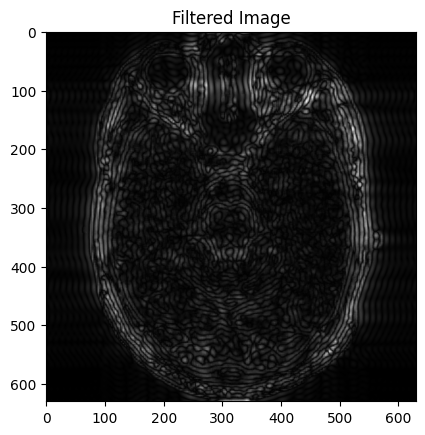

In [41]:
fshift_masked = spectrum * mask
img_filtered = np.abs(ifft2(fshift_masked))

plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image')
plt.show()

# Dilation Filter

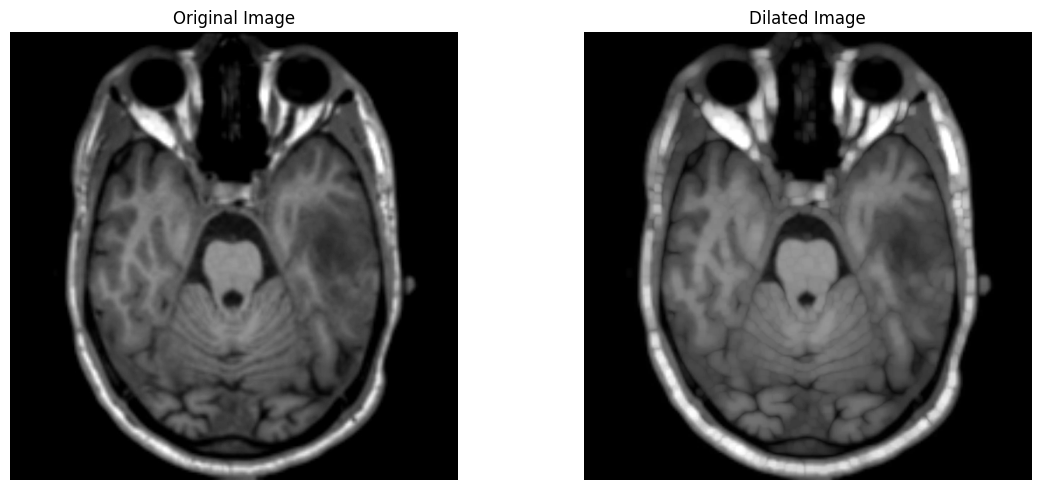

In [42]:
kernel = np.ones((5, 5), np.uint8) 

dilated = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# erosion filter

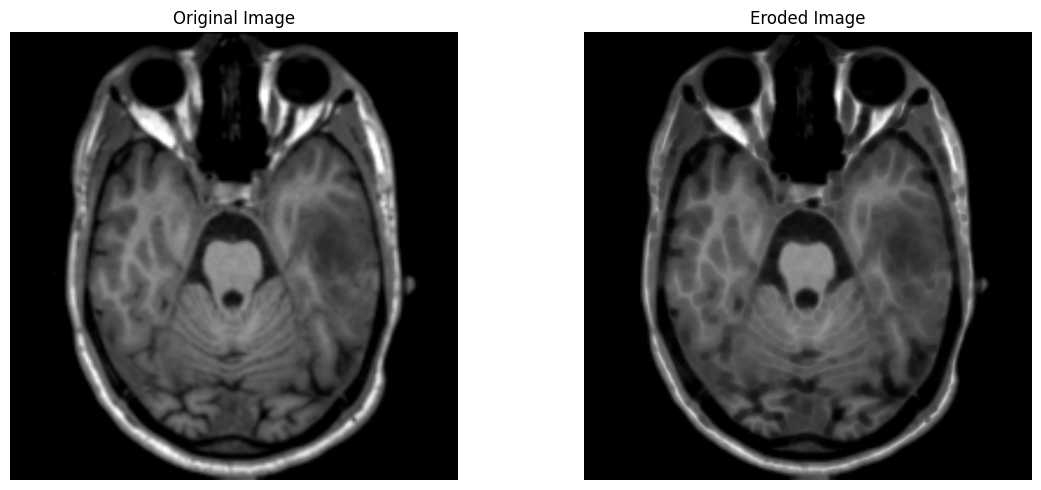

In [43]:
kernel = np.ones((5, 5), np.uint8)  

eroded = cv2.erode(image, kernel, iterations=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# closing filter

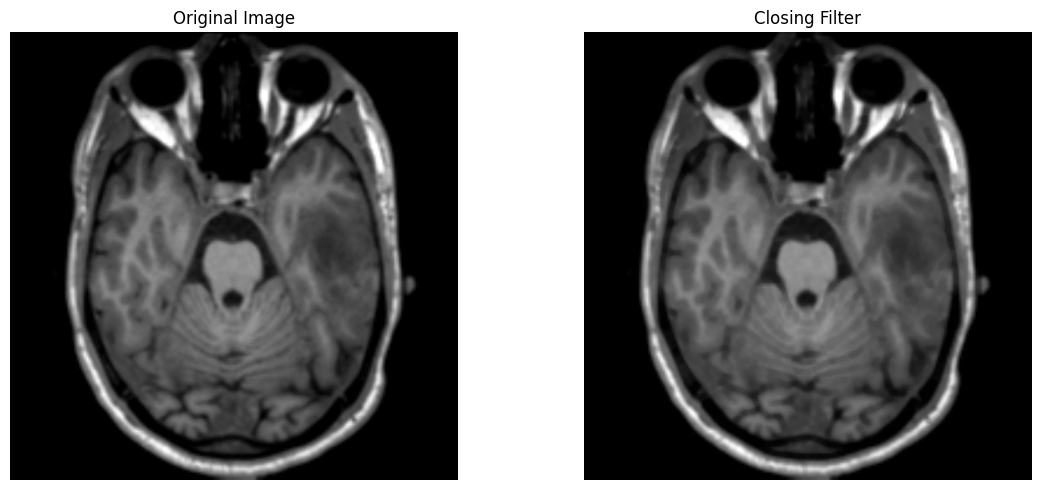

In [44]:

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title('Closing Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

# opening filter

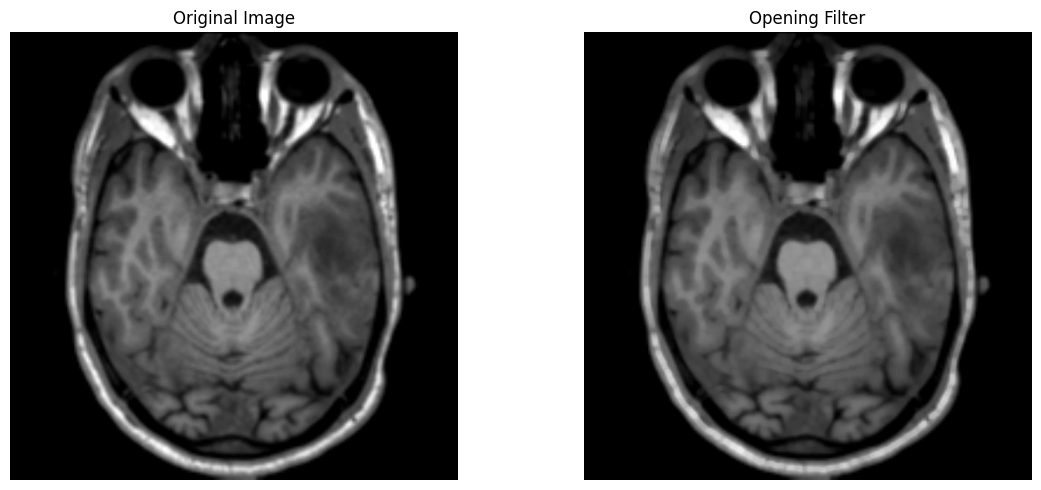

In [45]:
kernel = np.ones((5, 5), np.uint8)  

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opening Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

# Morphological filters

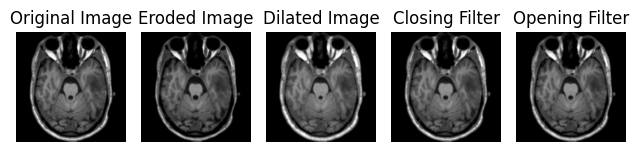

In [46]:
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(closing, cmap='gray')
plt.title('Closing Filter')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.imshow(opening, cmap='gray')
plt.title('Opening Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create Data Frame from Dataset

In [47]:
data_path = "/kaggle/input/brain-tumor-mri-images-44c"
folds = os.listdir(data_path)
data_paths = []
labels = []
for fold in folds:
    folderPath = os.path.join(data_path,fold)
    files = os.listdir(folderPath)
    for file in files:
     data_paths.append(os.path.join(folderPath,file))
     labels.append(fold.split(' ')[0])
data_df = pd.DataFrame(data = {"file_paths": data_paths, "labels": labels})

# Apply Histogram Equalization at the dataaset

In [48]:

output_path = "/kaggle/working/processed_mri_images"
os.makedirs(output_path, exist_ok=True)
processed_paths = []
processed_labels = []

for idx, row in tqdm(data_df.iterrows(), total=len(data_df), desc="Processing images"):
    img_path = row['file_paths']
    label = row['labels']
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Could not read {img_path}")
        continue
    
    # Apply histogram equalization
    img_eq = cv2.equalizeHist(img)
    
    # Create label folder in output directory
    label_folder = os.path.join(output_path, label)
    os.makedirs(label_folder, exist_ok=True)
    
    # Save processed image
    filename = os.path.basename(img_path)
    output_img_path = os.path.join(label_folder, filename)
    cv2.imwrite(output_img_path, img_eq)
    
    processed_paths.append(output_img_path)
    processed_labels.append(label)

# Create new dataframe with processed images
processed_df = pd.DataFrame(data={"file_paths": processed_paths, "labels": processed_labels})

print(f"\nProcessed dataset size: {len(processed_df)}")
print(f"Images saved to: {output_path}")

Processing images: 100%|██████████| 4479/4479 [00:51<00:00, 86.58it/s] 


Processed dataset size: 4479
Images saved to: /kaggle/working/processed_mri_images


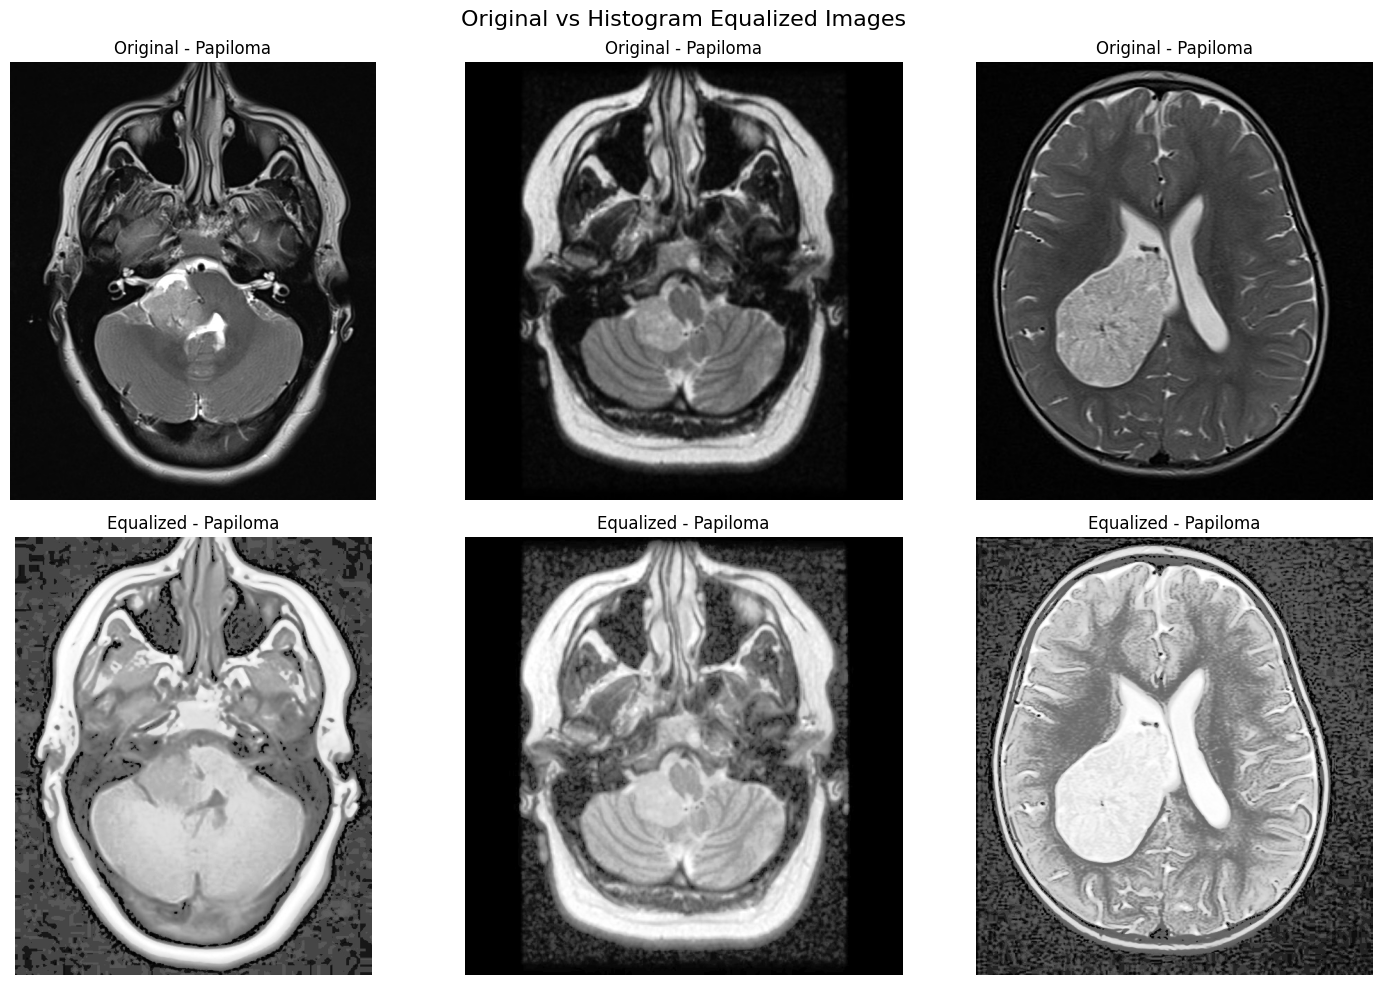


Comparison image saved to: /kaggle/working/comparison.png


In [49]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Original vs Histogram Equalized Images', fontsize=16)

for i in range(3):
    # Original image
    orig_img = cv2.imread(data_df['file_paths'].iloc[i], cv2.IMREAD_GRAYSCALE)
    axes[0, i].imshow(orig_img, cmap='gray')
    axes[0, i].set_title(f'Original - {data_df["labels"].iloc[i]}')
    axes[0, i].axis('off')
    
    # Processed image
    proc_img = cv2.imread(processed_df['file_paths'].iloc[i], cv2.IMREAD_GRAYSCALE)
    axes[1, i].imshow(proc_img, cmap='gray')
    axes[1, i].set_title(f'Equalized - {processed_df["labels"].iloc[i]}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig('/kaggle/working/comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nComparison image saved to: /kaggle/working/comparison.png")

# plot value counts for a column in a dataframe

In [50]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=True, palette='summer'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

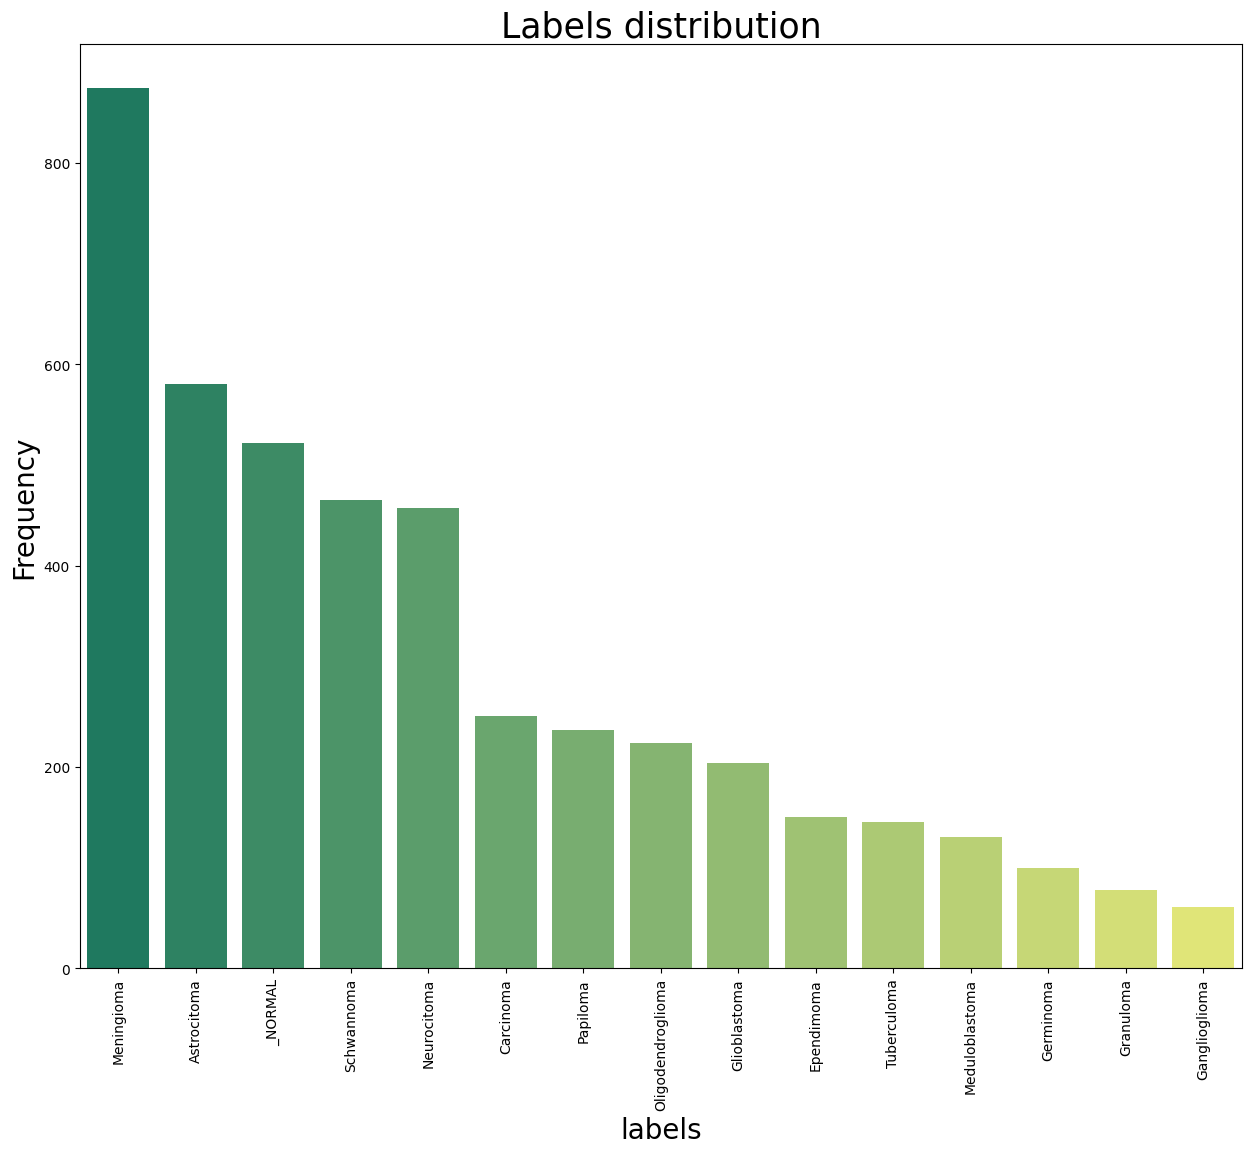

In [51]:
x = processed_df['labels']
order = x.value_counts().index
count_plot(x, "Labels distribution", "labels", 'Frequency', 15,12, order=order)

# split data

In [52]:

def split_data(data_df, target_col='labels', train_size=0.8, valid_size=0.1, test_size=0.1, random_state=42):
    tr_df, dummy = train_test_split(
        data_df, 
        train_size=train_size, 
        random_state=random_state, 
        stratify=data_df[target_col]
    )

    valid_df, test_df = train_test_split(
        dummy,
        train_size=valid_size / (valid_size + test_size),  
        random_state=random_state,
        stratify=dummy[target_col]
    )

    return tr_df, valid_df, test_df


In [53]:
tr_df, valid_df, test_df = split_data(processed_df)

# create generators

In [54]:
def create_generators(tr_df, valid_df, test_df, 
                      x_col="file_paths", y_col="labels", 
                      target_size=(224, 224), batch_size=32):
    gen = ImageDataGenerator(horizontal_flip=True, fill_mode='nearest')
    tr_gen = gen.flow_from_dataframe(
        dataframe=tr_df,
        x_col=x_col,
        y_col=y_col,
        target_size=target_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )

    valid_gen = gen.flow_from_dataframe(
        dataframe=valid_df,
        x_col=x_col,
        y_col=y_col,
        target_size=target_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )
    test_gen = gen.flow_from_dataframe(
        dataframe=test_df,
        x_col=x_col,
        y_col=y_col,
        target_size=target_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=False
    )

    return tr_gen, valid_gen, test_gen


In [55]:
tr_gen, valid_gen, test_gen = create_generators(tr_df, valid_df, test_df)


Found 3582 validated image filenames belonging to 15 classes.
Found 448 validated image filenames belonging to 15 classes.
Found 448 validated image filenames belonging to 15 classes.


# show samples

In [56]:
def show_batch_samples(generator, class_names=None, n=25):
    images, labels = next(generator)
    if class_names is None:
        class_names = list(generator.class_indices.keys())
    plt.figure(figsize=(10, 6))
    for i in range(n):
        plt.subplot(int(np.sqrt(n)), int(np.sqrt(n)), i + 1)
        image = images[i] / 255.0  
        plt.imshow(image)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.tight_layout()
    plt.show()


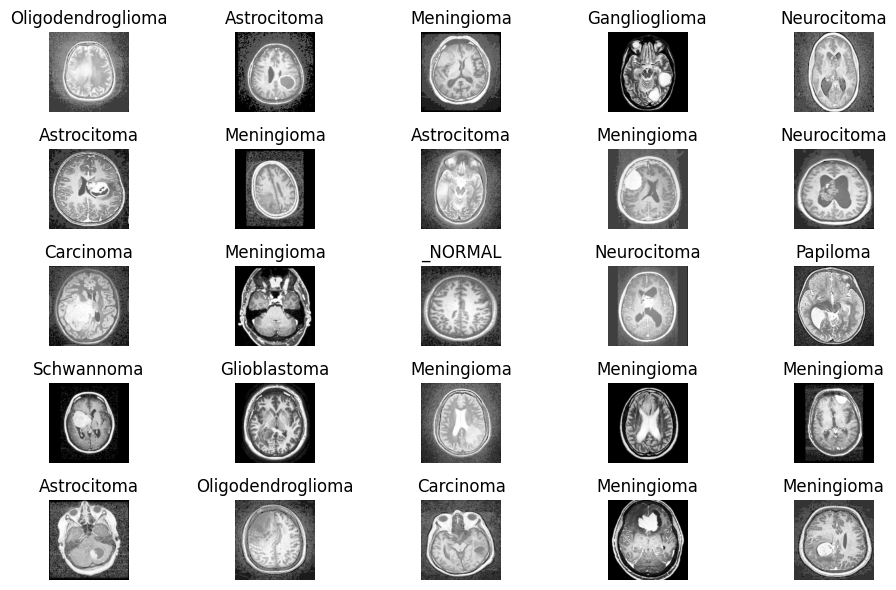

In [57]:
show_batch_samples(tr_gen)


# Callbacks

In [58]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras

class MyCallback(keras.callbacks.Callback):
    def __init__(self,patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        #self.my_model = model
        self.patience = patience 
        self.stop_patience = stop_patience 
        self.threshold = threshold 
        self.factor = factor 
        self.batches = batches 
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_permission = 1

        # callback variables
        self.count = 0 
        self.stop_count = 0
        self.best_epoch = 1  
        self.highest_tracc = 0.0 
        self.lowest_vloss = np.inf
        self.best_weights = None
        self.initial_weights = None
        self.initial_lr = None

    def on_train_begin(self, logs=None):
        self.initial_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        self.best_weights = self.model.get_weights()
        self.initial_weights = self.model.get_weights()
        self.model.optimizer.learning_rate.assign(self.initial_lr)

        msg = 'Do you want model to ask you to halt training manually [y/n]?'
        print(msg)
        ans = input('').strip().lower()
        if ans == 'y':
            self.ask_permission = 1
        else:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format(
            'Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration'
        )
        print(msg)
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration % 3600) // 60
        seconds = tr_duration % 60

        msg = f'Training finished in {int(hours)}h {int(minutes)}m {seconds:.2f}s'
        print(msg)

        # Restore best weights
        self.model.set_weights(self.best_weights)

    def on_train_batch_end(self, batch, logs=None):
        acc = logs.get('accuracy', 0) * 100
        loss = logs.get('loss', 0)
        msg = f'Processing batch {batch} of {self.batches} - Accuracy: {acc:.2f}% - Loss: {loss:.5f}'
        print(msg, '\r', end='')

    def on_epoch_begin(self, epoch, logs=None):
        self.ep_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        if self.count >= self.patience - 1:
            next_lr = lr * self.factor 
            self.model.optimizer.learning_rate.assign(next_lr)
            self.count = 0
            self.stop_count += 1
        else:
            next_lr = lr  
        if isinstance(self.model.optimizer, tf.keras.optimizers.Adam):  # Check if the optimizer is Adam
            self.model.optimizer.learning_rate.assign(next_lr)
            #tf.keras.backend.set_value(self.model.optimizer.learning_rate, next_lr)  # Update the learning rate
        else:
            print("Optimizer is not of type Adam.")

        acc = logs.get('accuracy')
        v_acc = logs.get('val_accuracy')
        loss = logs.get('loss')
        v_loss = logs.get('val_loss')

        monitor = ''
        pimprov = 0.0
        next_lr = lr

        if acc < self.threshold:
            monitor = 'accuracy'
            pimprov = 0.0 if epoch == 0 or self.highest_tracc == 0 else (acc - self.highest_tracc) * 100 / self.highest_tracc
            if acc > self.highest_tracc:
                self.highest_tracc = acc
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                self.best_epoch = epoch + 1
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
            else:
                if self.count >= self.patience - 1:
                    next_lr = lr * self.factor
                    self.model.optimizer.learning_rate.assign(next_lr)
                    #tf.keras.backend.set_value(self.model.optimizer.learning_rate, next_lr)
                    self.count = 0
                    self.stop_count += 1
                else:
                    self.count += 1
        else:
            monitor = 'val_loss'
            pimprov = 0.0 if epoch == 0 or self.lowest_vloss == np.inf else (self.lowest_vloss - v_loss) * 100 / self.lowest_vloss
            if v_loss < self.lowest_vloss:
                self.lowest_vloss = v_loss
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                self.best_epoch = epoch + 1
            else:
                if self.count >= self.patience - 1:
                    next_lr = lr * self.factor
                    self.model.optimizer.learning_rate.assign(next_lr)
                    #tf.keras.backend.set_value(self.model.optimizer.learning_rate, next_lr)
                    self.count = 0
                    self.stop_count += 1
                else:
                    self.count += 1
                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{epoch+1:^8}{loss:^10.3f}{acc*100:^9.2f}{v_loss:^9.3f}{v_acc*100:^9.2f}{lr:^9.5f}{next_lr:^9.5f}{monitor:^10}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count >= self.stop_patience:
            print(f'Training stopped at epoch {epoch+1} after {self.stop_patience} LR adjustments without improvement.')
            self.model.stop_training = True

        elif self.ask_epoch is not None and self.ask_permission and (epoch + 1) >= self.ask_epoch:
            print('Enter H to halt training or a number to continue training for that many more epochs:')
            ans = input('').strip()
            if ans.lower() == 'h':
                print(f'Training stopped manually at epoch {epoch + 1}')
                self.model.stop_training = True
            else:
                try:
                    more_epochs = int(ans)
                    self.ask_epoch += more_epochs
                    print(f'Training will continue to epoch {self.ask_epoch}')
                except:
                    print('Invalid input. Training will continue.')


# train data

In [59]:
def train_models(input_shape=(224, 224, 3), num_classes=15, train_gen=None, valid_gen=None):
    models_dict = {}
    
    # List of models to compare
    efficientnet_models = {
        "EfficientNetB0": EfficientNetB0,
        "EfficientNetB3": EfficientNetB3,
        "EfficientNetB5": EfficientNetB5,
    }
    
    for name, model_arch in efficientnet_models.items():
        print(f"\n" + "="*40)
        print(f" TRAINING MODEL: {name} ")
        print("="*40 + "\n")
        
        # Load pre-trained base
        base_model = model_arch(
            include_top=False,
            weights='imagenet',
            input_shape=input_shape,
            pooling='max'
        )

        model = Sequential([
            base_model,
            Flatten(),
            BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
            Dense(256, activation='relu'),
            Dropout(rate=0.45, seed=123),
            Dense(num_classes, activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Parameters for your MyCallback
        batch_size = 32   
        epochs = 40   
        patience = 1  
        stop_patience = 3   
        threshold = 0.9  
        factor = 0.5   
        ask_epoch = 15 # Allows the model to train a bit before asking to stop
        batches = int(np.ceil(len(train_gen.labels) / batch_size))    

        callbacks = [MyCallback(patience=patience, stop_patience=stop_patience,
                                threshold=threshold, factor=factor, batches=batches,
                                epochs=epochs, ask_epoch=ask_epoch)]
        
        # Train and store results
        history = model.fit(train_gen, validation_data=valid_gen, epochs=epochs, verbose=0,
                            callbacks=callbacks, shuffle=False)
        
        models_dict[name] = {
            "classifier": model,
            "model_history": history
        }
        print(f"\nCompleted {name} training.\n")
        
    return models_dict

In [60]:
models_dict = train_models(train_gen=tr_gen,valid_gen=valid_gen)


 TRAINING MODEL: EfficientNetB0 



I0000 00:00:1766044703.077202      33 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766044703.077809      33 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Do you want model to ask you to halt training manually [y/n]?


 n


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


I0000 00:00:1766044818.720683     107 service.cc:148] XLA service 0x7daa7c0053e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766044818.721499     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766044818.721519     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766044823.416669     107 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1766044833.384431     107 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766044833.528174     107 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766044833.964568     107 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. Th

E0000 00:00:1766044878.915505     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766044879.058625     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766044879.496707     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766044879.637846     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


   1      1.726     53.18    1.657    56.92   0.00100  0.00100  accuracy    0.00    138.68 
   2      0.594     81.74    0.698    77.90   0.00050  0.00050  accuracy   53.70    14.66  
   3      0.260     91.54    0.403    87.28   0.00025  0.00025  val_loss   42.27    14.70  
   4      0.154     95.53    0.290    91.29   0.00013  0.00013  val_loss   27.98    15.10  
   5      0.118     96.31    0.206    94.42   0.00006  0.00006  val_loss   29.00    15.25  
   6      0.103     97.26    0.164    95.09   0.00003  0.00003  val_loss   20.39    15.61  
   7      0.087     97.46    0.142    95.98   0.00002  0.00002  val_loss   13.70    16.05  
   8      0.081     97.91    0.133    96.43   0.00001  0.00001  val_loss    5.87    16.19  
   9      0.087     97.18    0.117    96.65   0.00000  0.00000  val_loss   11.85    15.89  
   10     0.079     97.74    0.145    95.98   0.00000  0.00000  val_loss   -23.47   15.86  
   11     0.084     97.74    0.134    96.88   0.00000  0.00000  val_loss   -13.7

 n


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


E0000 00:00:1766045192.939096     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045193.087009     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045193.686130     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045193.833683     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


E0000 00:00:1766045272.892581     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045273.040753     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045273.600412     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045273.748421     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


   1      2.008     48.91    2.947    51.34   0.00100  0.00100  accuracy    0.00    225.09 
   2      0.728     78.67    0.569    83.04   0.00050  0.00050  accuracy   60.84    32.09  
   3      0.298     90.23    0.329    88.84   0.00025  0.00025  val_loss   42.13    31.06  
   4      0.178     94.36    0.208    94.20   0.00013  0.00013  val_loss   36.78    30.83  
   5      0.112     96.54    0.159    95.09   0.00006  0.00006  val_loss   23.46    31.15  
   6      0.104     96.96    0.142    95.98   0.00003  0.00003  val_loss   11.09    30.92  
   7      0.089     97.52    0.124    95.98   0.00002  0.00002  val_loss   12.67    31.02  
   8      0.079     97.85    0.125    96.21   0.00001  0.00000  val_loss   -1.08    31.11  
   9      0.085     97.40    0.125    96.65   0.00000  0.00000  val_loss   -1.00    31.08  
Training stopped at epoch 9 after 3 LR adjustments without improvement.
Training finished in 0h 7m 55.53s

Completed EfficientNetB3 training.


 TRAINING MODEL: EfficientNe

 n


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


E0000 00:00:1766045811.934004     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045812.076227     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045812.482704     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045812.629110     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045813.013552     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

E0000 00:00:1766045941.852776     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045941.991255     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045942.336278     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045942.482970     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766045942.861425     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

   1      2.162     48.44    2.704    56.25   0.00100  0.00100  accuracy    0.00    345.74 
   2      0.830     76.52    0.615    79.02   0.00050  0.00050  accuracy   57.98    60.70  
   3      0.319     90.23    0.344    88.84   0.00025  0.00025  val_loss   44.02    59.02  
   4      0.140     95.59    0.269    91.52   0.00013  0.00013  val_loss   21.77    59.99  
   5      0.096     96.98    0.217    93.97   0.00006  0.00006  val_loss   19.55    59.63  
   6      0.082     97.52    0.179    95.09   0.00003  0.00003  val_loss   17.57    60.06  
   7      0.060     98.44    0.144    96.21   0.00002  0.00002  val_loss   19.35    59.91  
   8      0.063     98.24    0.114    96.88   0.00001  0.00001  val_loss   20.87    59.86  
   9      0.053     98.49    0.123    96.65   0.00000  0.00000  val_loss   -7.56    60.07  
   10     0.055     98.46    0.101    96.88   0.00000  0.00000  val_loss   11.32    59.85  
   11     0.054     98.32    0.115    96.65   0.00000  0.00000  val_loss   -13.9

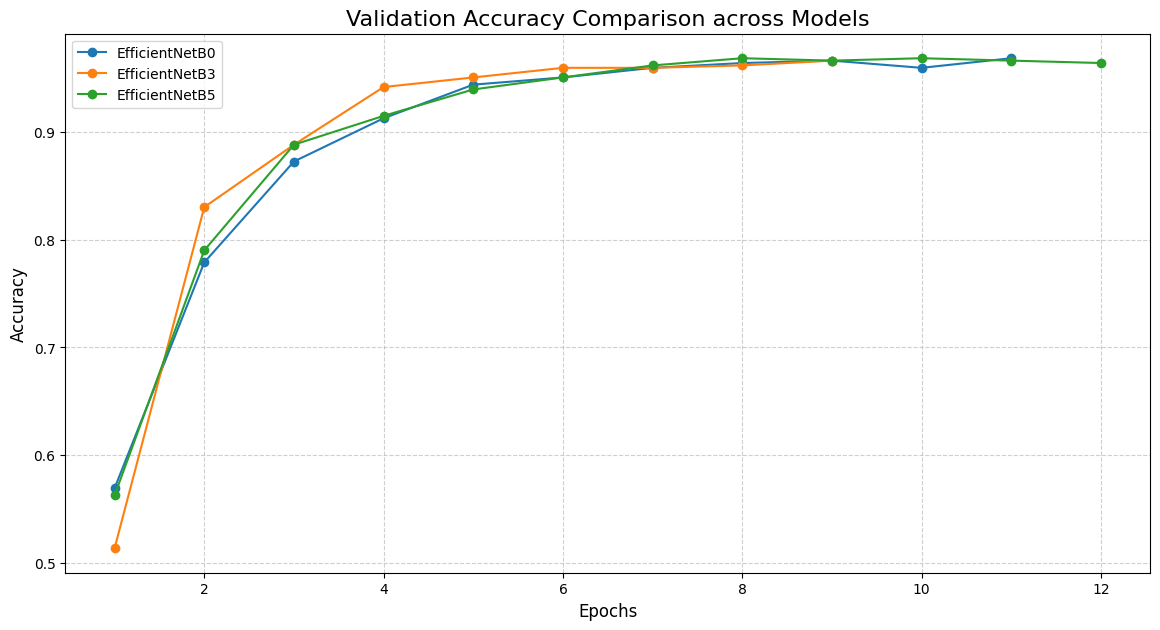

In [61]:
plt.figure(figsize=(14, 7))
for name, data in models_dict.items():
    val_acc = data["model_history"].history['val_accuracy']
    plt.plot(range(1, len(val_acc) + 1), val_acc, marker='o', label=f'{name}')

plt.title('Validation Accuracy Comparison across Models', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [62]:
results_data = []
for name, data in models_dict.items():
    # Evaluate on the test generator
    test_score = data["classifier"].evaluate(test_gen, verbose=0)
    results_data.append({
        "Model": name,
        "Test Accuracy (%)": round(test_score[1] * 100, 2),
        "Test Loss": round(test_score[0], 4),
        "Total Epochs": len(data["model_history"].history['loss'])
    })

# Display as a sorted table
leaderboard = pd.DataFrame(results_data).sort_values(by="Test Accuracy (%)", ascending=False)
print("\n" + "*"*30)
print(" FINAL MODEL RANKINGS ")
print("*"*30)
print(leaderboard.to_string(index=False))


******************************
 FINAL MODEL RANKINGS 
******************************
         Model  Test Accuracy (%)  Test Loss  Total Epochs
EfficientNetB3              96.65     0.1243             9
EfficientNetB0              96.21     0.1391            11
EfficientNetB5              96.21     0.1190            12


# test and evaluate models

In [63]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
for model_name, i in models_dict.items():
    model = i["classifier"]
    print(f"Evaluating model: {model_name}")
    train_score = model.evaluate(tr_gen, steps= test_steps, verbose= 1)
    valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
    test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print('_' * 100)

Evaluating model: EfficientNetB0
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9982 - loss: 0.0055
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9760 - loss: 0.0685
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9654 - loss: 0.1151
Train Loss:  0.009529756382107735
Train Accuracy:  0.9955357313156128
--------------------
Validation Loss:  0.08622590452432632
Validation Accuracy:  0.9732142686843872
--------------------
Test Loss:  0.0913185328245163
Test Accuracy:  0.96875
____________________________________________________________________________________________________
Evaluating model: EfficientNetB3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 1.0000 - loss: 0.0073
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9602 - loss: 0.1207
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9722 - loss: 0.1155
Train Loss:  0.00789609830826521
Train Accuracy:  1.0
--------------------
Validation Loss:  0.13398511707782745
Validation Accuracy:  0.959821403026580

# plot loss and training of models

In [64]:
def plot_training(models_dict):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''
    for model_name, i in models_dict.items():
        hist = i["model_history"]
        print(f"Evaluating model: {model_name}")
    # Define needed variables
        tr_acc = hist.history['accuracy']
        tr_loss = hist.history['loss']
        val_acc = hist.history['val_accuracy']
        val_loss = hist.history['val_loss']
        index_loss = np.argmin(val_loss)
        val_lowest = val_loss[index_loss]
        index_acc = np.argmax(val_acc)
        acc_highest = val_acc[index_acc]
        Epochs = [i+1 for i in range(len(tr_acc))]
        loss_label = f'best epoch= {str(index_loss + 1)}'
        acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
        plt.figure(figsize= (20, 8))
        plt.style.use('fivethirtyeight')
        
        plt.subplot(1, 2, 1)
        plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
        plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
        plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
    
        plt.subplot(1, 2, 2)
        plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
        plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
        plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        print('_' * 50)
        plt.tight_layout
        plt.show()

In [65]:
models_dict

{'EfficientNetB0': {'classifier': <Sequential name=sequential, built=True>,
  'model_history': <keras.src.callbacks.history.History at 0x7dab54467a90>},
 'EfficientNetB3': {'classifier': <Sequential name=sequential_1, built=True>,
  'model_history': <keras.src.callbacks.history.History at 0x7daa811fb410>},
 'EfficientNetB5': {'classifier': <Sequential name=sequential_2, built=True>,
  'model_history': <keras.src.callbacks.history.History at 0x7daa6fcdb410>}}

Evaluating model: EfficientNetB0
__________________________________________________


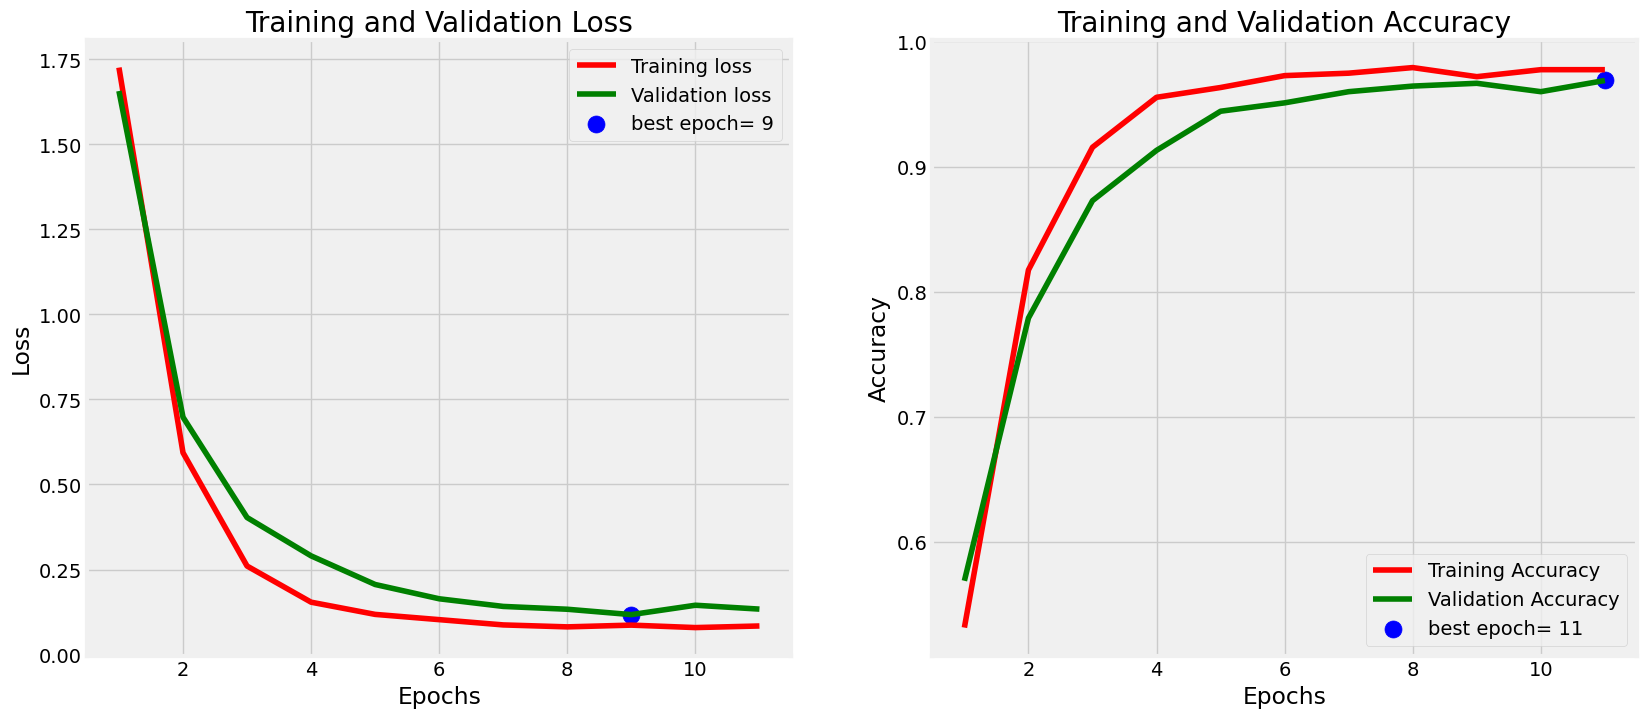

Evaluating model: EfficientNetB3
__________________________________________________


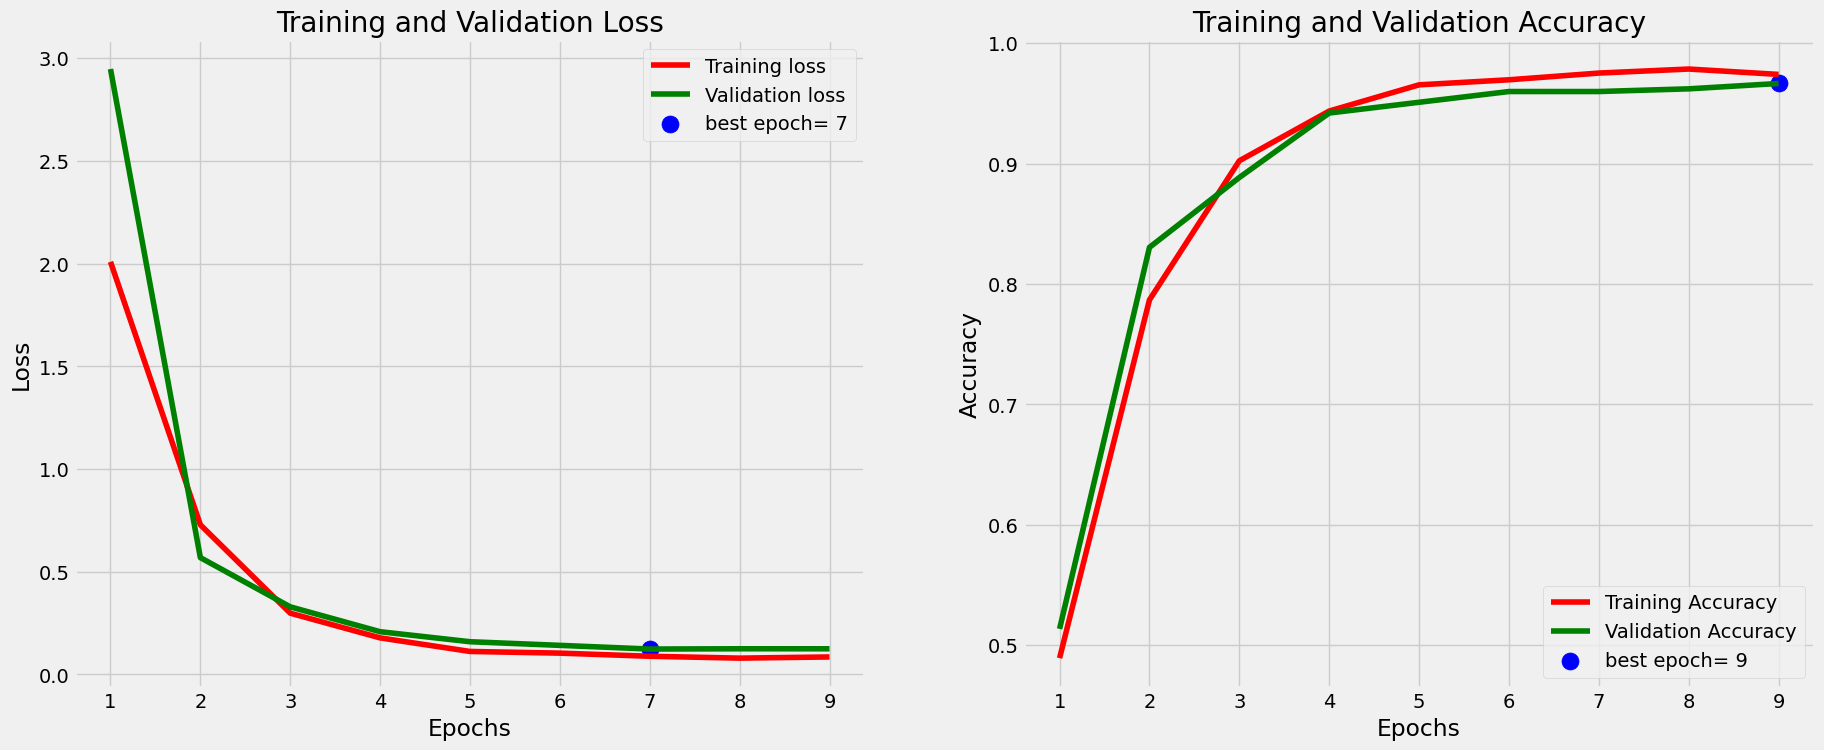

Evaluating model: EfficientNetB5
__________________________________________________


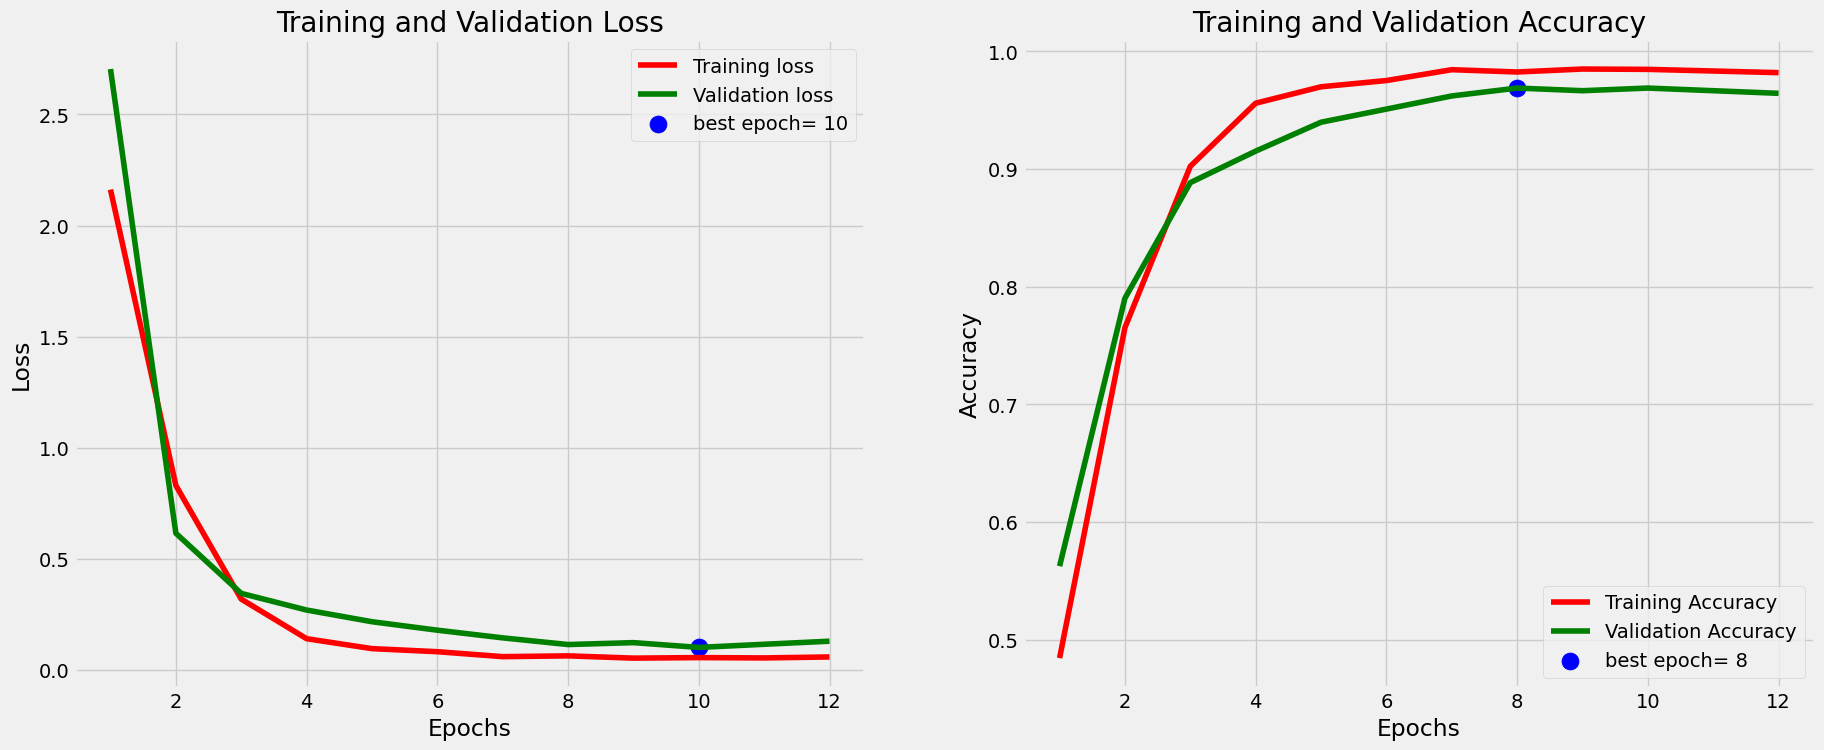

In [66]:
plot_training(models_dict)

# prediction of data

In [67]:
 for model_name, i in models_dict.items():
        print(f"Evaluating model: {model_name}")
        model = i["classifier"]
        i["y_pred"] = model.predict(test_gen)

# Convert the predicted probabilities to class labels
        i["y_pred_labels"] = np.argmax(i["y_pred"], axis=1)

# Get the true class labels from the test data generator
        i["y_true_labels"] = test_gen.classes

Evaluating model: EfficientNetB0
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step
Evaluating model: EfficientNetB3
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step
Evaluating model: EfficientNetB5
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step


# plot confusion matrix

Evaluating model: EfficientNetB0


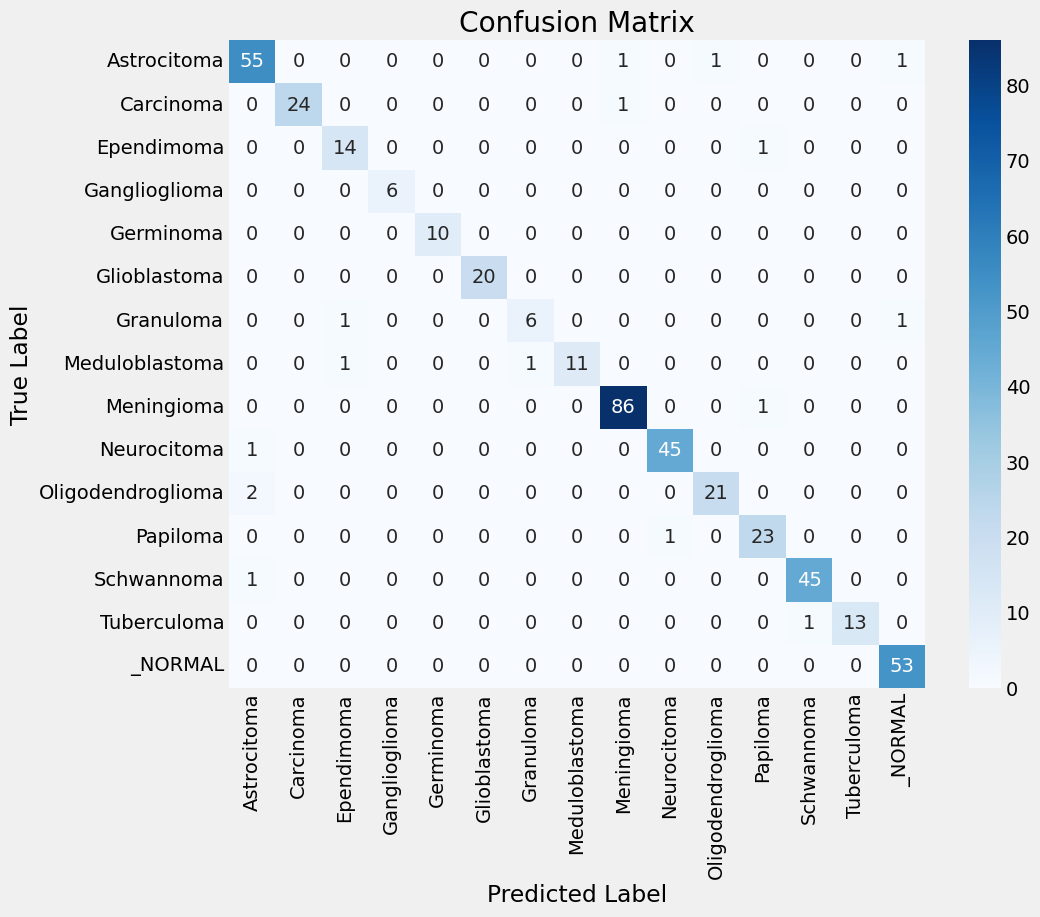

Evaluating model: EfficientNetB3


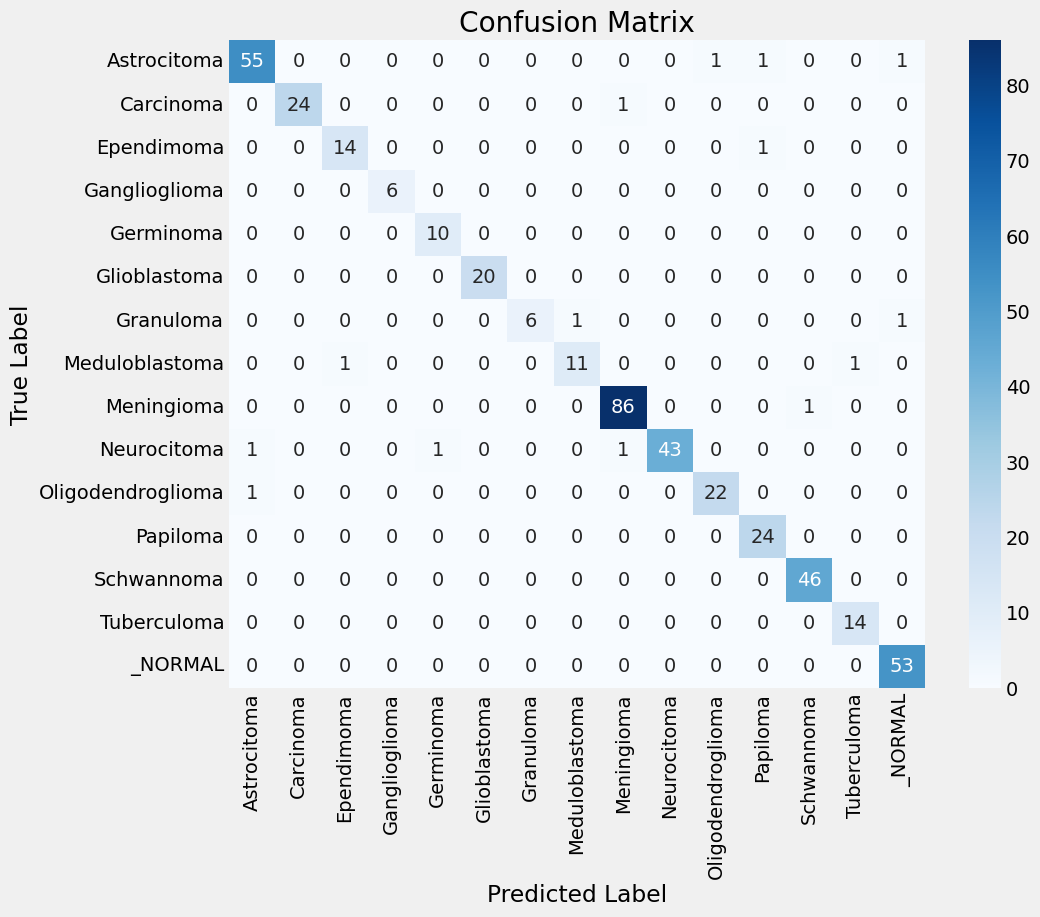

Evaluating model: EfficientNetB5


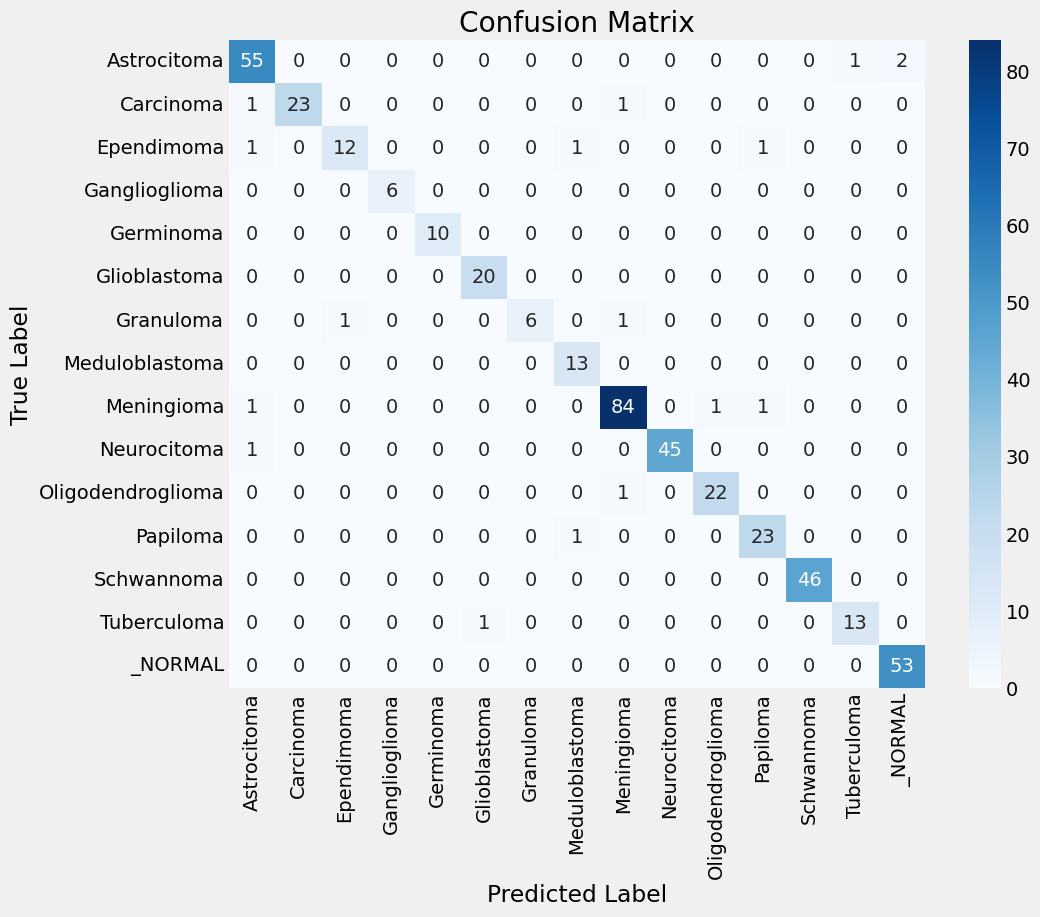

In [68]:
class_names = list(test_gen.class_indices.keys())
for model_name, i in models_dict.items():
        print(f"Evaluating model: {model_name}")
        model = i["classifier"]
        
        # Compute the confusion matrix
        confusion_mtx = confusion_matrix(i["y_true_labels"], i["y_pred_labels"])
        
        # Plot the confusion matrix using Seaborn heatmap
        plt.figure(figsize=(10,8))
        sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


# plot classification report

In [69]:
for model_name, i in models_dict.items():
    print(f"Evaluating model: {model_name}")
    report = classification_report(i["y_true_labels"], i["y_pred_labels"], target_names=class_names)
    print("Classification Report: ")
    print(report)
    print('_' * 50)

Evaluating model: EfficientNetB0
Classification Report: 
                   precision    recall  f1-score   support

      Astrocitoma       0.93      0.95      0.94        58
        Carcinoma       1.00      0.96      0.98        25
       Ependimoma       0.88      0.93      0.90        15
    Ganglioglioma       1.00      1.00      1.00         6
        Germinoma       1.00      1.00      1.00        10
     Glioblastoma       1.00      1.00      1.00        20
        Granuloma       0.86      0.75      0.80         8
   Meduloblastoma       1.00      0.85      0.92        13
       Meningioma       0.98      0.99      0.98        87
      Neurocitoma       0.98      0.98      0.98        46
Oligodendroglioma       0.95      0.91      0.93        23
         Papiloma       0.92      0.96      0.94        24
       Schwannoma       0.98      0.98      0.98        46
      Tuberculoma       1.00      0.93      0.96        14
          _NORMAL       0.96      1.00      0.98        5